# Задание 1

In [316]:
from scipy import stats

scale = 1
while True:
    p = stats.norm.cdf(x=1, loc=1.06, scale=scale)
    if p <= 0.05:
        print(p, scale)
        break
    else:
        scale = scale - 0.00001

0.04996554168875769 0.03647000000191674


### среднеквадратическое отклонение = scale = 0.03647000000191674

##### Найдем долю коробок с массой меньше либо равной 1.1 

In [22]:
p = stats.norm.cdf(x=1.1, loc=1.06, scale=0.03647000000191674)
p

0.8636338105045287

##### Доля коробок с массой больше 1.1 кг: 1-p

In [24]:
result = (1 - p) * 100
result

13.636618949547131

# Задание 2

In [317]:
m_1 = (12 + 14) / 2
disp_1 = ((14-12) ** 2) / 12

##### При количестве конфет 30 можно ожидать, что масса коробок будет распределена по нормальному закону

In [318]:
import math
m = 30 * m_1
disp = 30 * disp_1

In [274]:
p_less_390 = stats.norm.cdf(x=390, loc=m, scale=math.sqrt(disp))
p_less_390

0.5

In [319]:
p_greate_380_less_400 = stats.norm.cdf(x=400, loc=m, scale=math.sqrt(disp)) - stats.norm.cdf(x=380, loc=m, scale=math.sqrt(disp))
p_greate_380_less_400

0.9984345977419975

In [320]:
p_greate_395 = 1 - stats.norm.cdf(x=395, loc=m, scale=math.sqrt(disp))
p_greate_395

0.056923149003329065

# Задание 3

In [297]:
import numpy as np
n, p, q = 50, 0.5, 1 - p

##### мат. ожидание и дисперсия такого распределения 

In [298]:
m, d = n * p, n * p * q

##### тогда соответсвующие параметры нормального распределения средних:

In [307]:
def pdf_normal(x, N):
    loc = m
    scale = math.sqrt(d/N)
    return np.exp(-((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi)) 

In [308]:
def get_sample_means(N):
    result = np.empty(1000)
    for i in range(1000):
        x = np.random.binomial(n, p, N)
        result[i] = x.mean()
    return result

In [290]:
from matplotlib import pyplot as plt

In [309]:
ox = np.linspace(0, 50, 1000)

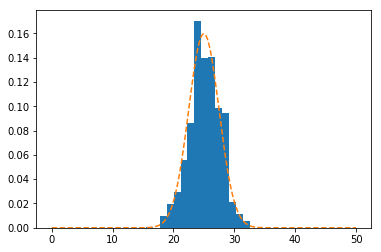

In [310]:
s2 = get_sample_means(2)
normal = np.array([pdf_normal(x, 2) for x in ox])
plt.hist(s2, density = True, bins=15)
plt.plot(ox, normal, linestyle="dashed")

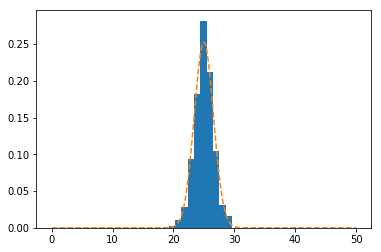

In [311]:
s5 = get_sample_means(5)
normal = np.array([pdf_normal(x, 5) for x in ox])
plt.hist(s5, density = True, bins=10)
plt.plot(ox, normal, linestyle="dashed")

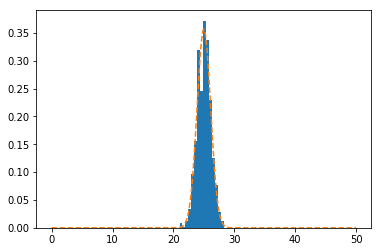

In [312]:
s10 = get_sample_means(10)
normal = np.array([pdf_normal(x, 10) for x in ox])
plt.hist(s10, density = True, bins=15)
plt.plot(ox, normal, linestyle="dashed")

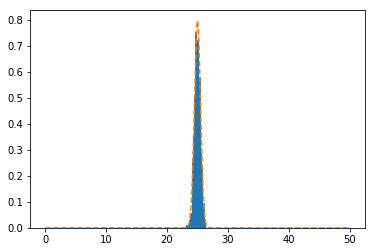

In [313]:
s50 = get_sample_means(50)
normal = np.array([pdf_normal(x, 50) for x in ox])
plt.hist(s50, density = True, bins=15)
plt.plot(ox, normal, linestyle="dashed")